The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ. Finally, we choose tha optimal value (resulting in the best approximation to a normal distribution) for your variable.

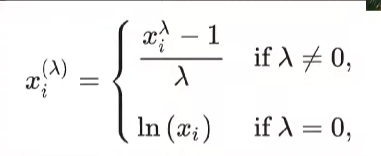

Box-Cox is only applicable for those number who is greater that zero. 

i.e. x > 0

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [23]:
df = pd.read_csv('concrete_data.csv')

In [24]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
df.shape

(1030, 9)

In [26]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [27]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
X = df.drop(columns=['Strength'])
y = df['Strength']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Its a regression task. We have to predict the strength. 

First of all, we predict with out any transformation.

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred = lr.predict(X_test)

In [32]:
#accuracy
r2_score(y_test, y_pred)

0.6275531792314848

In [33]:
#cross checking with cross val score
lr = LinearRegression()
print(np.mean(cross_val_score(lr, X, y, scoring='r2')))

0.4609940491662864


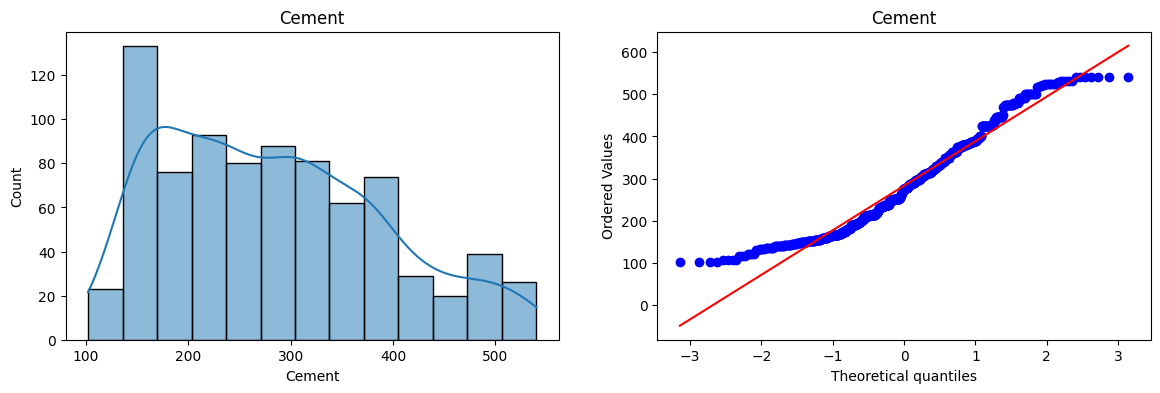

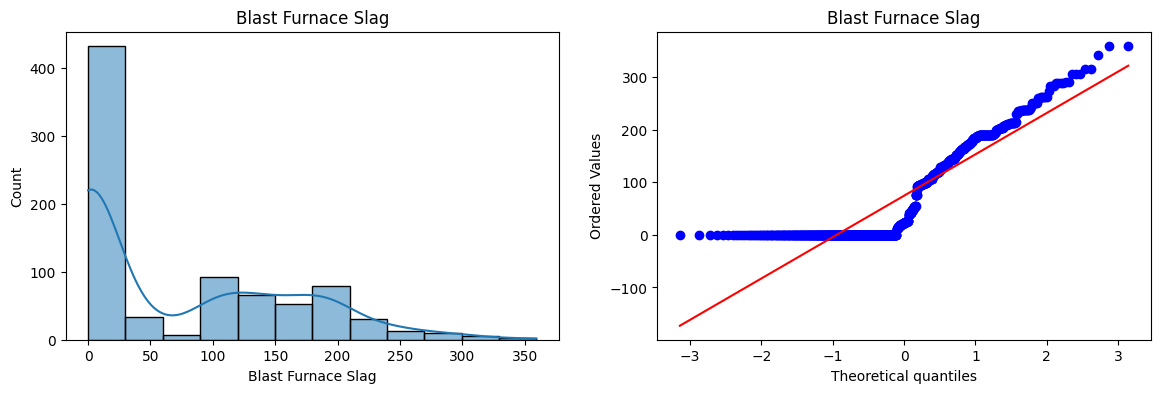

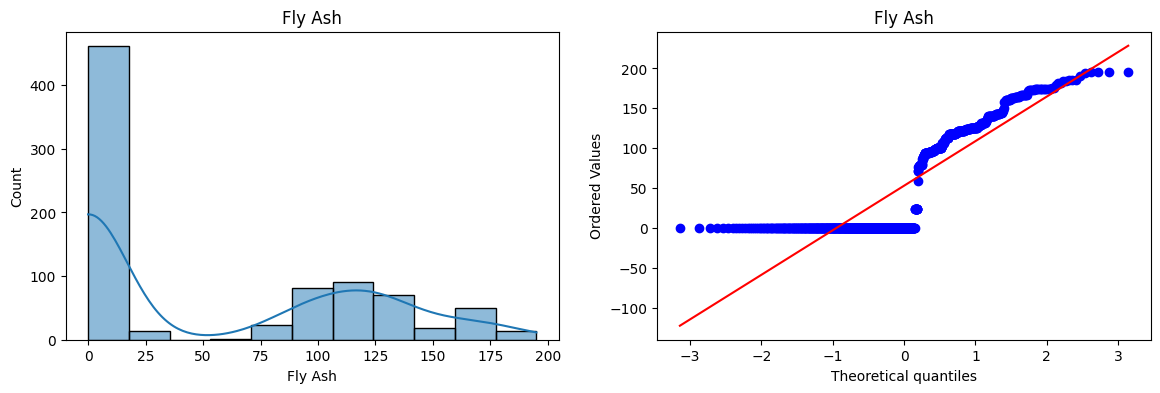

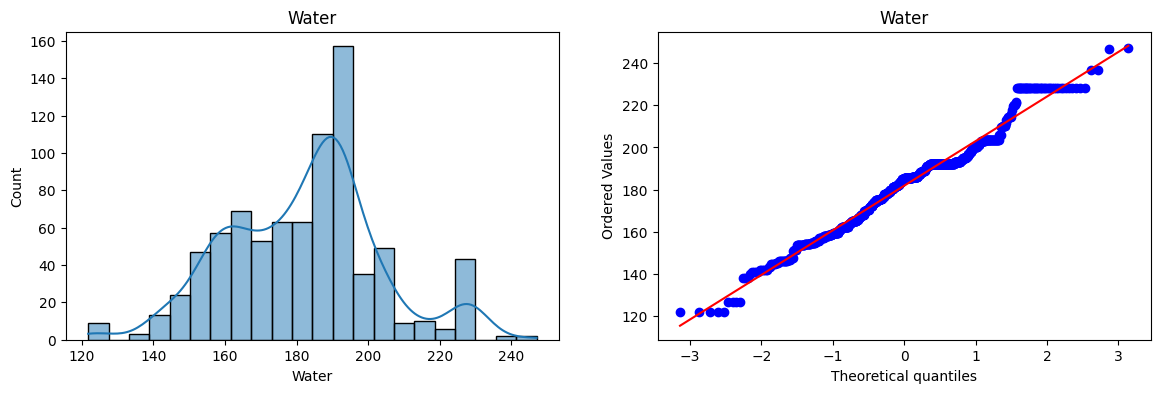

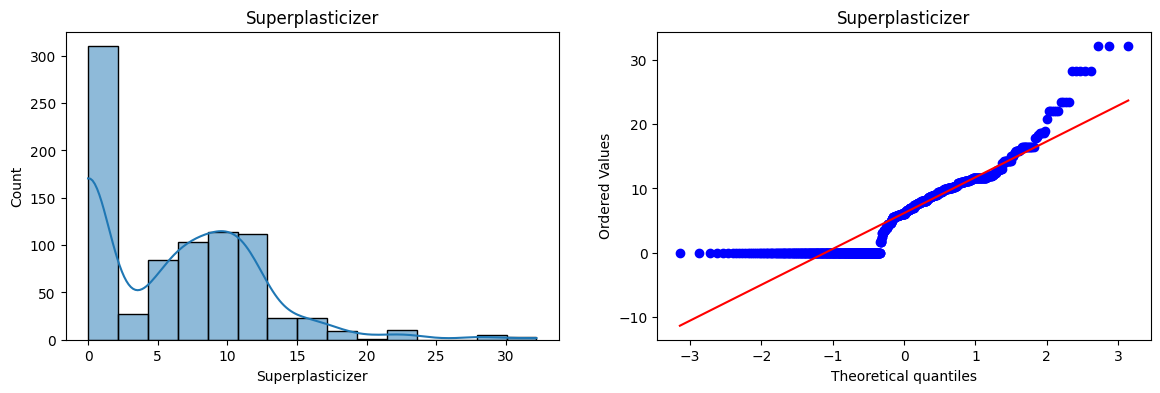

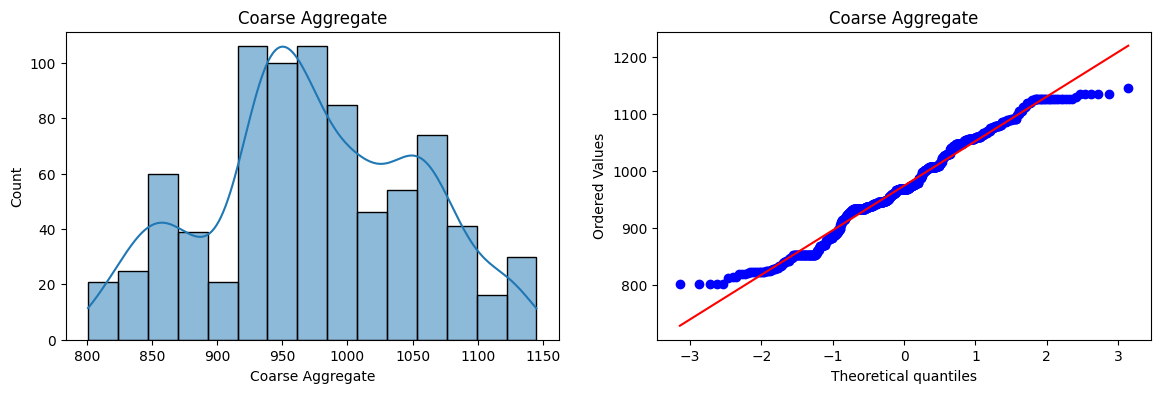

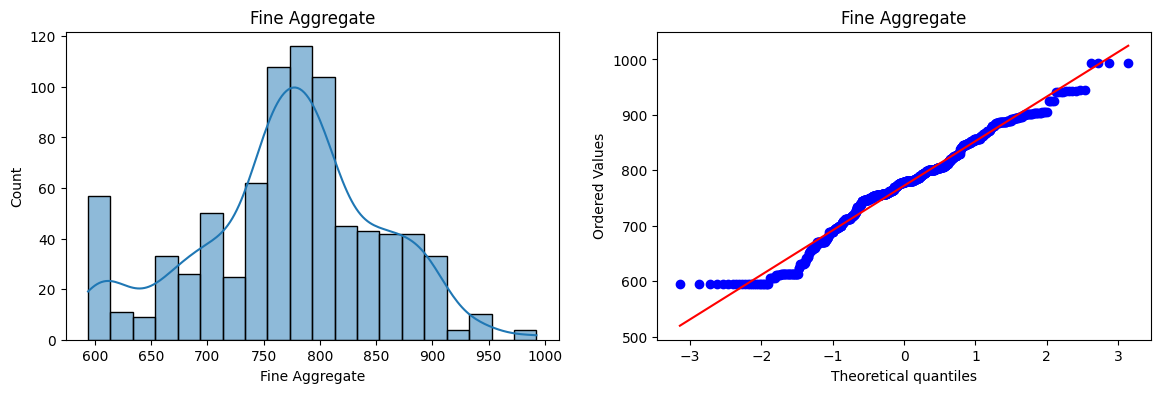

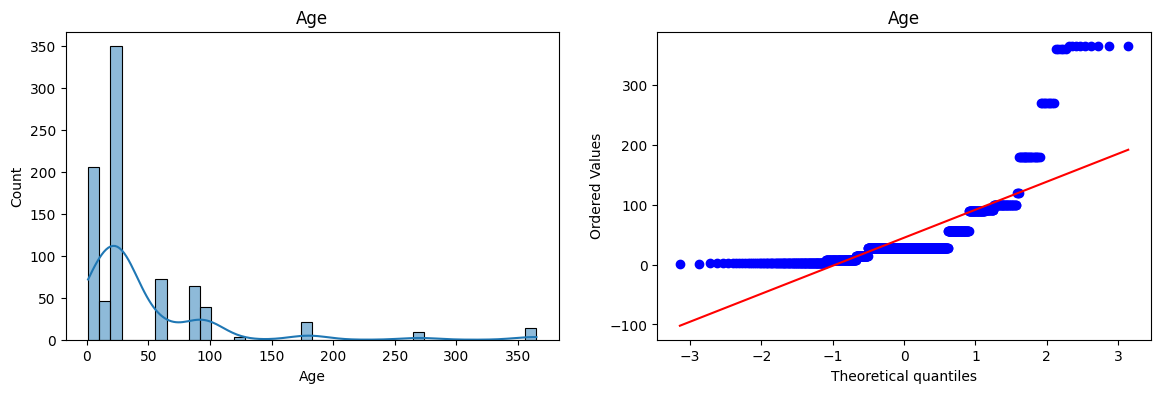

In [34]:
#plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()

**With Box-Cox Transformation**

In [43]:
pt = PowerTransformer(method='box-cox')
X_train_trasnformed = pt.fit_transform(X_train+0.000001) #we add 0.000001 because our data has zero input and box-cox is only applicable for greater than zero
X_test_transformed = pt.fit_transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambda': pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [38]:
lr = LinearRegression()
lr.fit(X_train_trasnformed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8055321004501623

In [41]:
#using cross val score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

np.float64(0.6662950326831086)

In [45]:
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=X_train.columns)

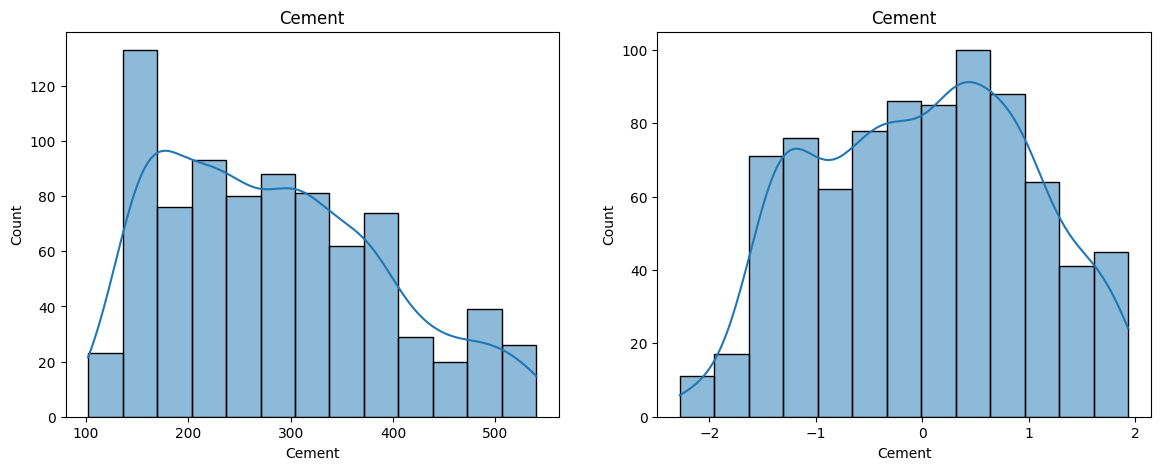

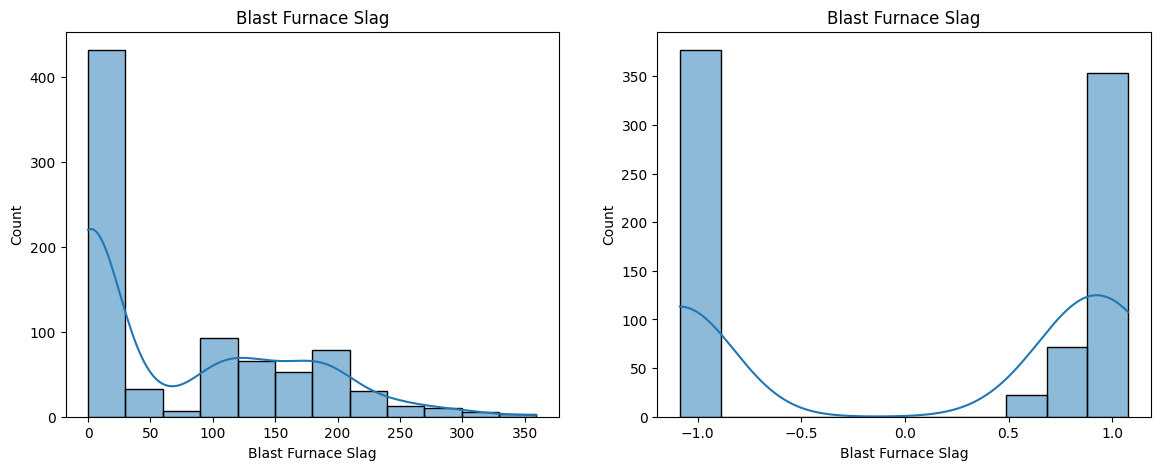

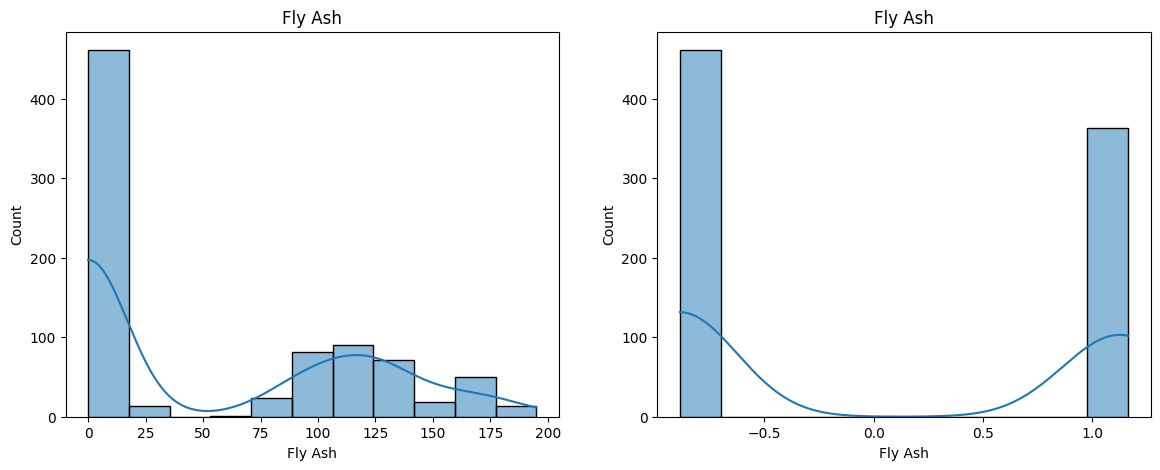

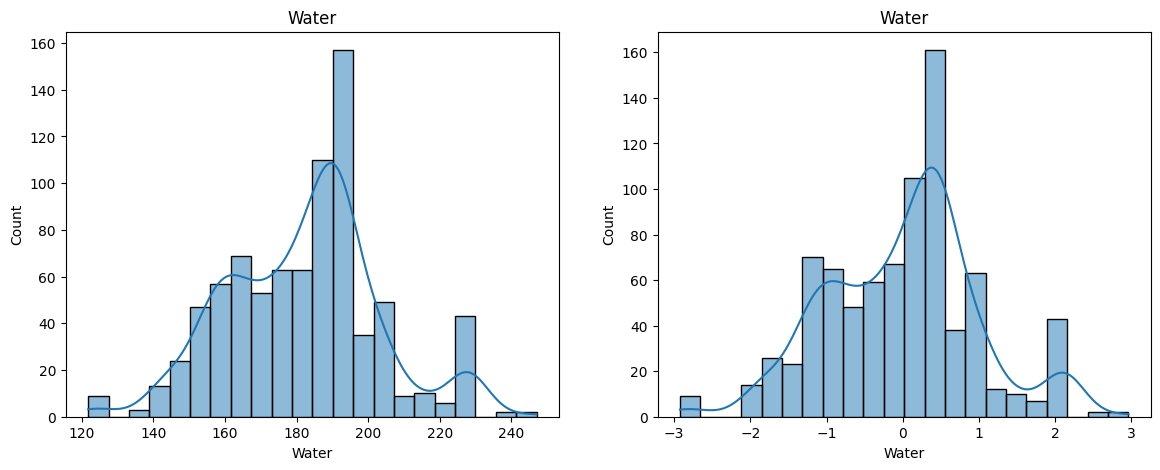

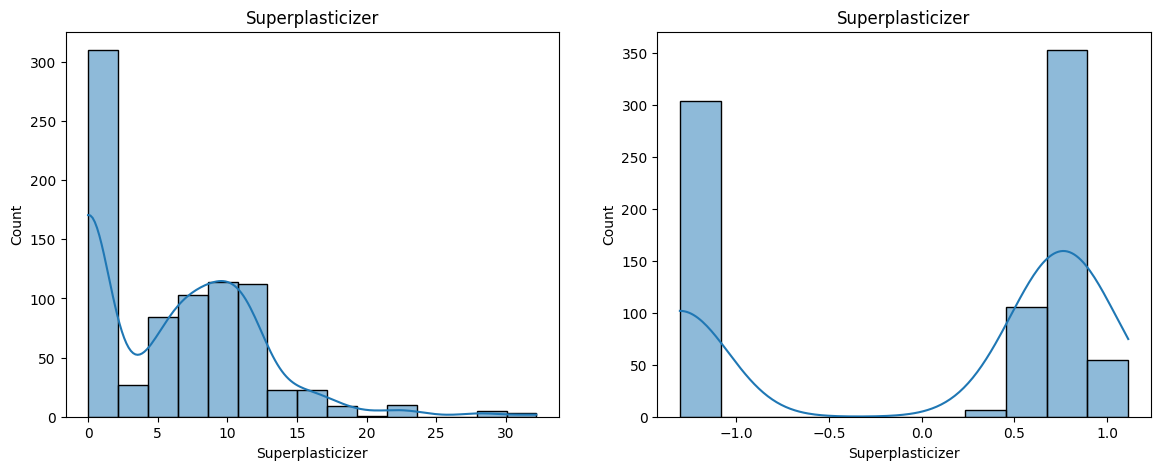

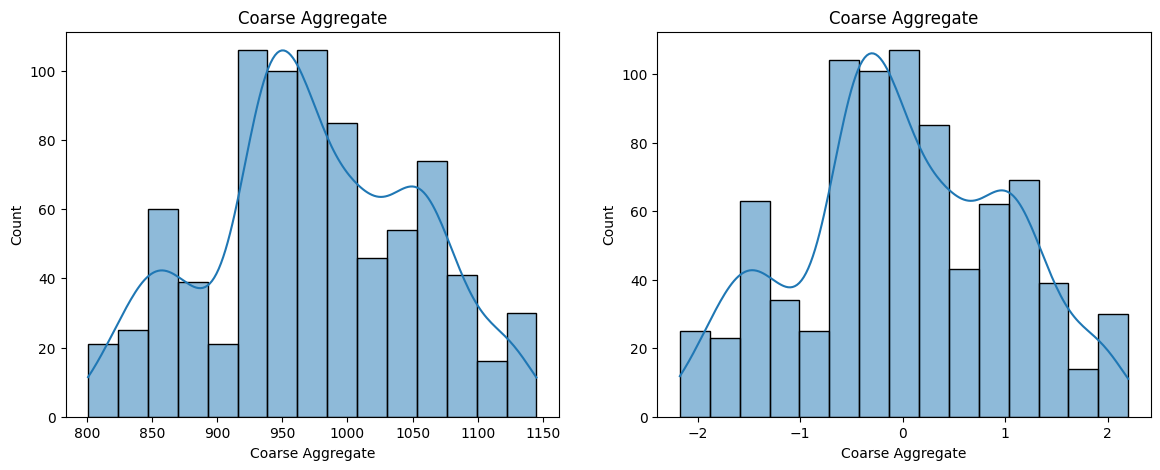

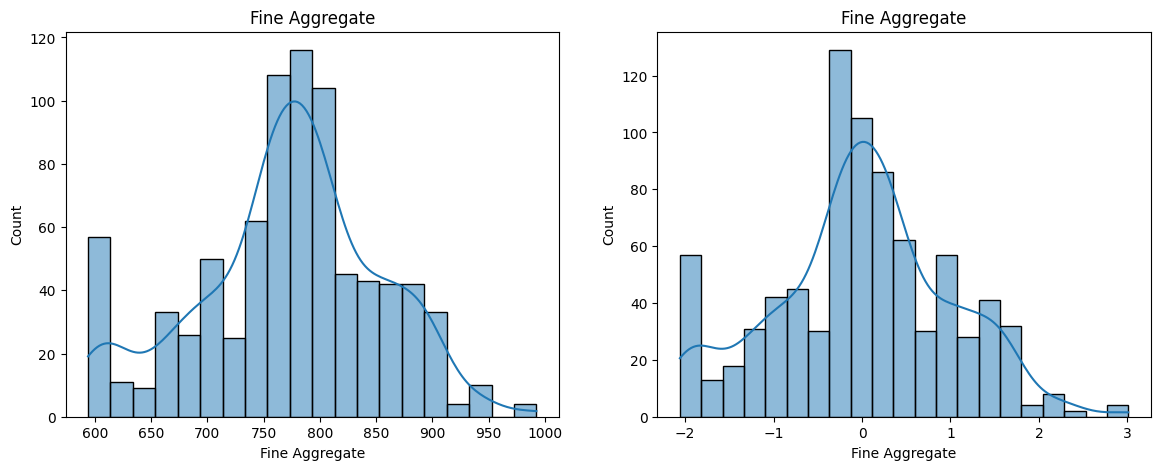

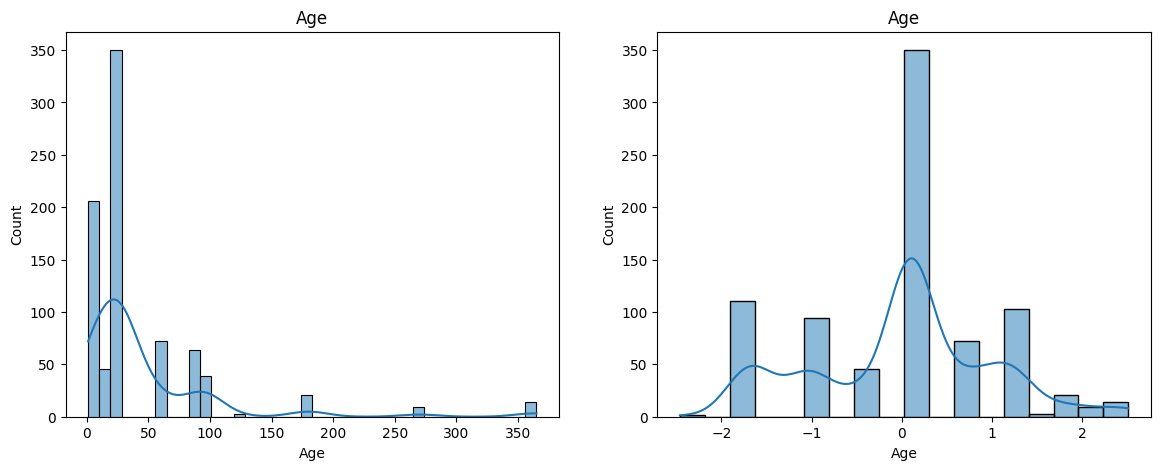

In [46]:
#Before and After comparision for Box-Cox Plot
for col in X_train_trasnformed.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_trasnformed[col], kde=True)
    plt.title(col)
    
    plt.show()

**Yeo-Johnson**

In [47]:
pt1 = PowerTransformer() #by default method = yeo-johnson

X_train_trasnformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trasnformed2, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))

0.8153845514645103


In [49]:
pd.DataFrame({"col":X_train.columns, 'Yeo_Johnson_lambda': pt1.lambdas_})

,col,Yeo_Johnson_lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [51]:
#applying cross val score
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

np.float64(0.6834625126992433)

In [52]:
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=X_train.columns)

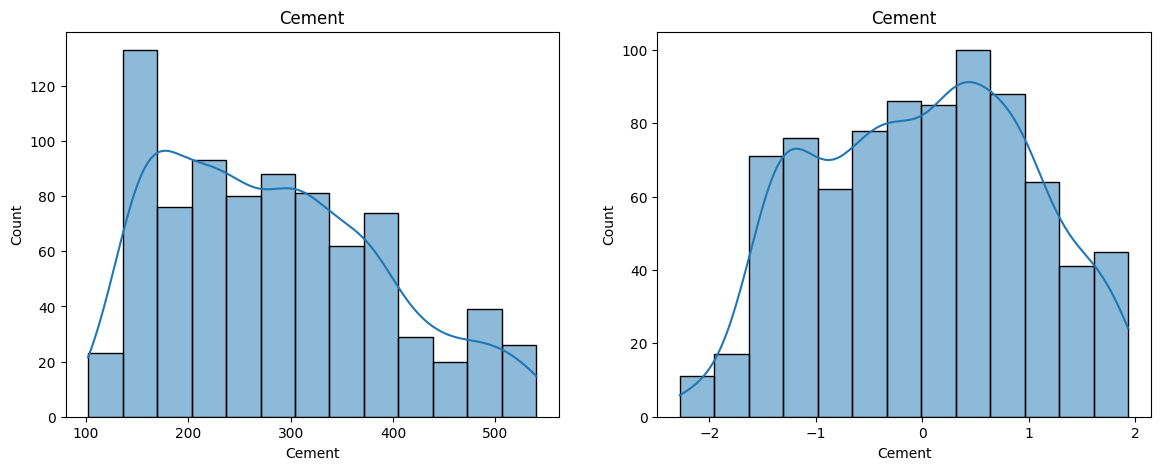

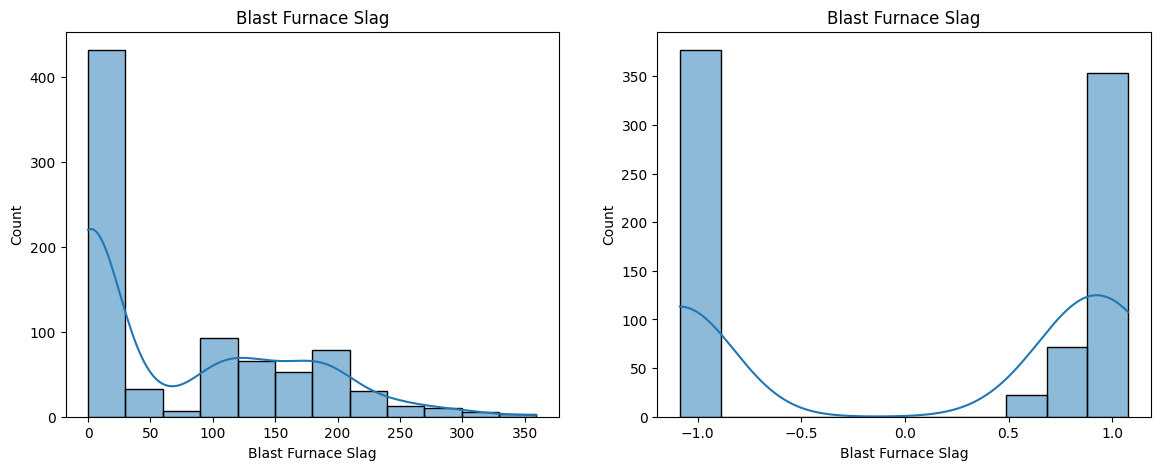

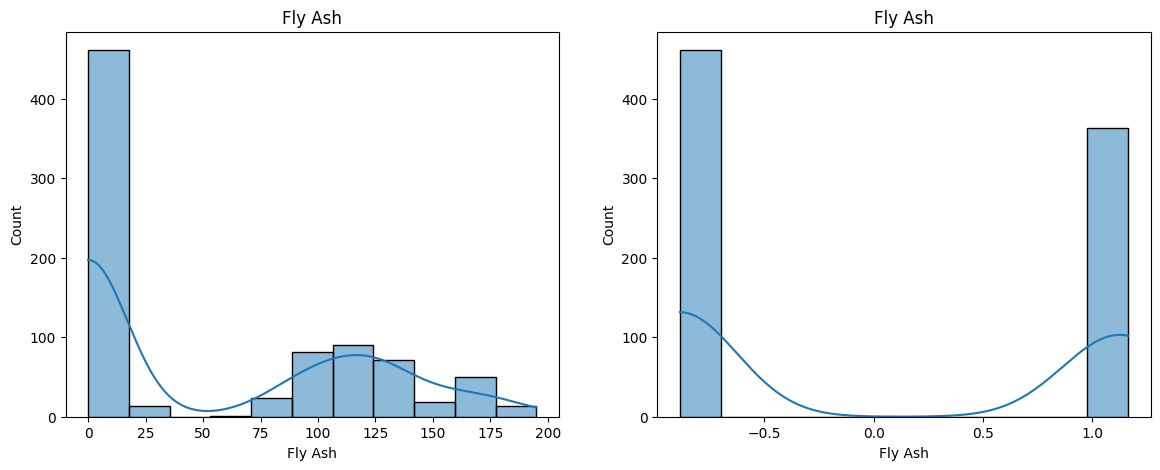

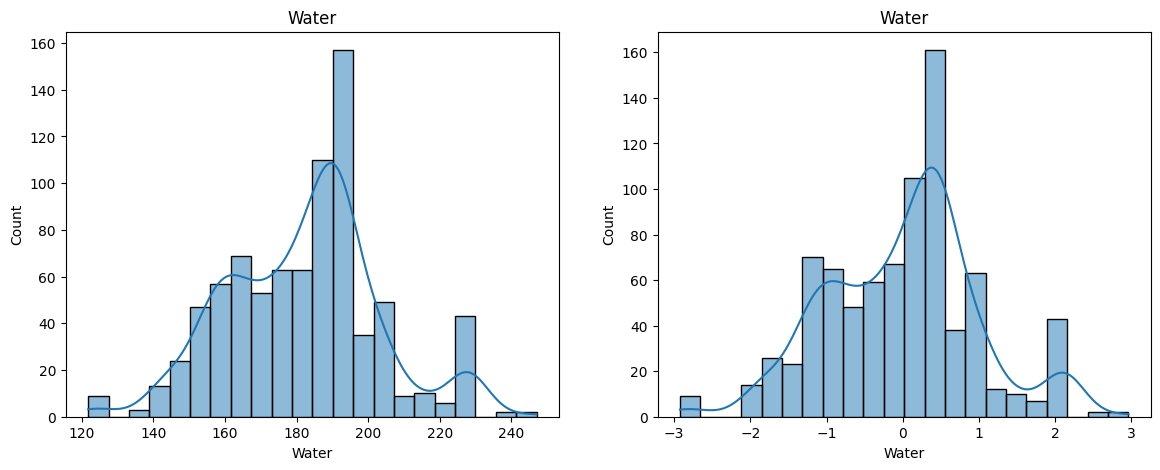

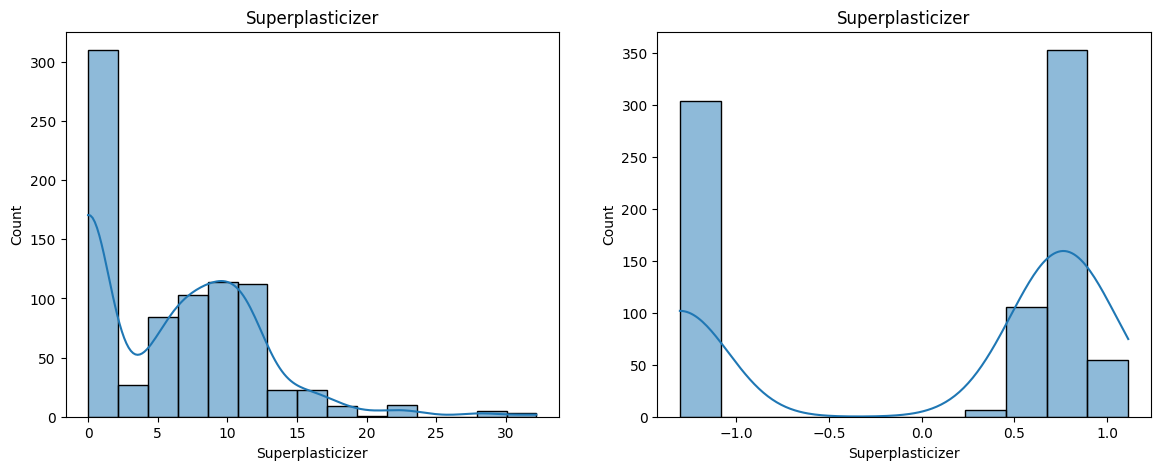

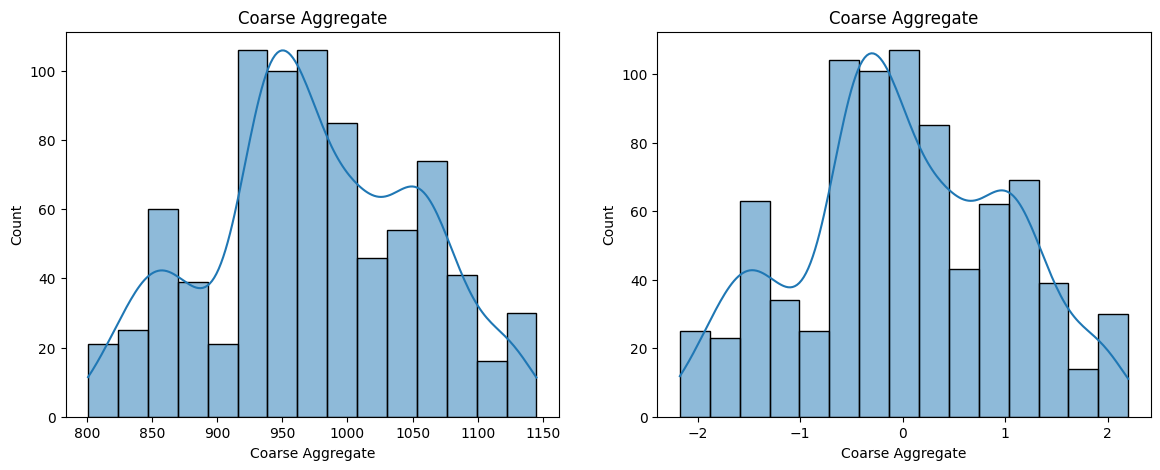

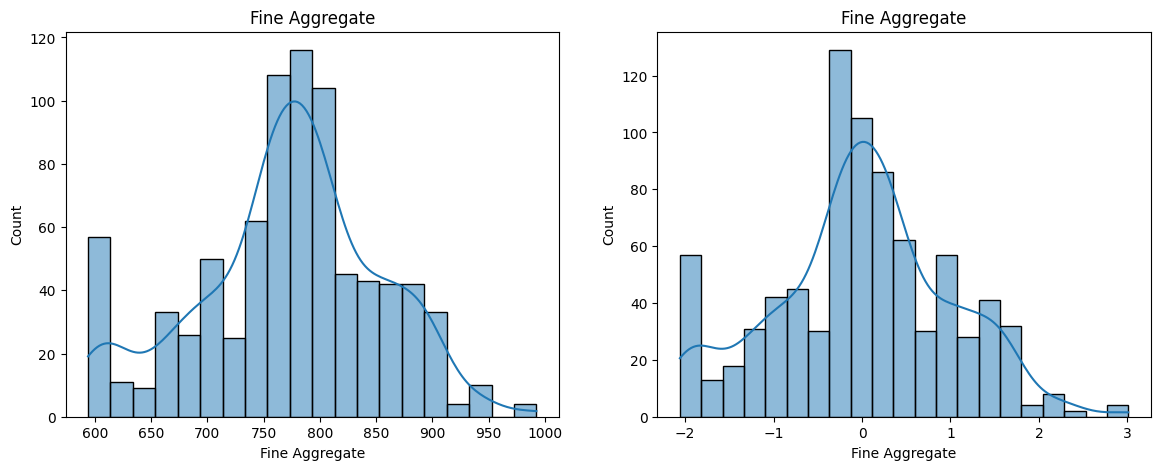

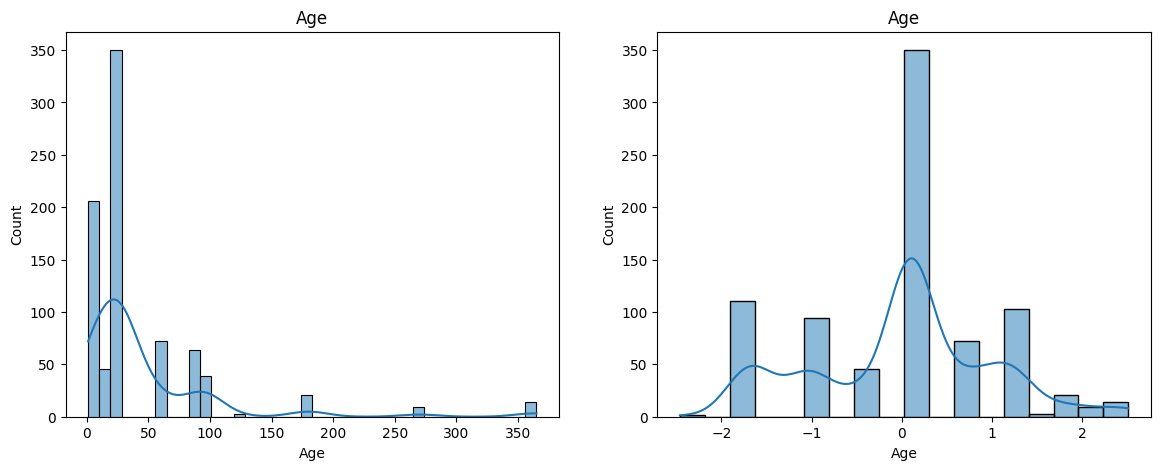

In [54]:
#before and after comparision for Yeo-Johnson
for col in X_train_trasnformed.columns:
    plt.figure(figsize = (14, 5))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_trasnformed[col], kde=True)
    plt.title(col)

    plt.show()

In [55]:
pd.DataFrame({"cols": X_train.columns, "Box-Cox_lambda": pt.lambdas_, "Yeo-Johnson_lambda": pt1.lambdas_})

,cols,Box-Cox_lambda,Yeo-Johnson_lambda
0,Cement,0.169544,0.213025
1,Blast Furnace Slag,0.016633,0.020476
2,Fly Ash,-0.136480,-0.038218
3,Water,0.808438,0.958936
4,Superplasticizer,0.264160,0.304951
5,Coarse Aggregate,1.129395,1.192751
6,Fine Aggregate,1.830764,1.975085
7,Age,0.001771,-0.062443
